# **Indicate And Identify The Rationality Of Used Car Prices**
Contributors: Chuheng (Kevin) Yu, Shih-han (Elle) Juan, Sifan Zhu, Weiming (Kevin) Wang, Ziyuan Li

<center>
<img src="https://drive.google.com/uc?id=1oMC8MWh0m5aS7IueTh4zMsWFQJJmeYeu" width="500", align='center'>
</div>

***
##Table of Contents




>[Indicate And Identify The Rationality Of Used Car Prices](#scrollTo=yhhgikBv0cau)

>>[Table of Contents](#scrollTo=sQeW45Q8SF0z)

>>[Project Definition](#scrollTo=gr-vUHEE0glX)

>>[Dataset Description](#scrollTo=PshkG4lWkMgJ)

>>[Report Summary](#scrollTo=OtOOd9pPuLHO)

>>[Data Source](#scrollTo=KUwDMl9u0lwM)

>>[Attributes Description](#scrollTo=RryseaJE0pS_)

>>[Data Preparation](#scrollTo=4F18bp5S0srX)

>>[Exploratary Analysis](#scrollTo=d0BIhZgbhexL)

>>>[Part 1: Exploratary](#scrollTo=hIsYXOtN02_i)

>>>>[1. Geographical distribution](#scrollTo=QTb4lM4kdgEa)

>>>>[2. Average used vehicles price over past 10 model years and correlation](#scrollTo=q7YYCxoi06KM)

>>>>>[Do price and year have a positive correlation?](#scrollTo=L-oNlhoEl2CJ)

>>>>[3. What is the variation of price?](#scrollTo=stmFAzW007c8)

>>>[Part 2: Data Exploring](#scrollTo=-PQHSwwa09w6)

>>>>[1. Which manufacturer has the highest average price? Which has the lowest?](#scrollTo=9OWuHx39mfc-)

>>>>[2. Does color affect the average price and the amounts of cars?](#scrollTo=mBLrV9VC0-39)

>>>>[3. Are there noticeable differences in price between each fuel type?](#scrollTo=aePvyQ-v1Cvq)

>>>>[4. What is the influence of odometer on price?](#scrollTo=_FQdRc_w1zwO)

>>>>[5. What is the relationship between vehicle type and price?](#scrollTo=mp-O7CYn11QT)

>>>>[6. How does engine and transmission layout affect the pricing of a used vehicle?](#scrollTo=MxtG-E9p12SN)

>>>>[7. Does title status affect the listing price of a used vehicle?](#scrollTo=3oqLATIX13gv)

>>>[Part 3: Deeper dive into manufacturers](#scrollTo=fKz4xDFvJSRE)

>>>>[1. Price, manufacturer and fuel type](#scrollTo=rSbVKn1nJoxh)

>>>>[2. Price, manufacturer and drive](#scrollTo=_jEGFVz3LDot)

>>>>[3. Price, manufacturer and vehicle type](#scrollTo=HBFPdj9fx4vS)

>>[Regression Analysis](#scrollTo=EkxgvyM6mweR)

>>>[Preprocessing, Sampling, and Traintest Split](#scrollTo=pHSsHI1SS1C-)

>>>[Linear Regression](#scrollTo=cwmYpDPITFW6)

>>>[SV Regression](#scrollTo=zV55HIVYTMai)

>>>[Polynomial Regression](#scrollTo=_ZWh99atTPLd)

>>>[RF Regression](#scrollTo=mPjnxIAOTShZ)

>>>[Result](#scrollTo=0iRSe0O7TWFp)

>>[Conclusion](#scrollTo=wl5Vptyboey2)

>>[References](#scrollTo=7r0pIzqTomr3)



***
## Project Definition
The globally used car market size was valued at $1.50 trillion in 2021, and it is projected to reach \$2.75 trillion by 2030. Moreover, the average used car price in the US has also increased by around 30%. On the demand side, around 8 out of 10 drivers’ first car is a used car in the United States. Our group wants to use EDA and regression to help customers save money and estimate a reliable price for a used vehicle. 

The goal of this project is to identify and evaluate the price of used cars based on their features. We will implement EDA methods and a regression model in python to help customers to identify what characteristics of a used car would affect the price.


***
## Dataset Description 

The dataset contains 426,880 rows and 26 columns, and was updated until May, 2021. The dataset is scraped every few months, it contains most all relevant information that Craigslist provides on car sales including columns like price, condition, manufacturer, latitude/longitude, and 18 other categories. For ML projects, consider feature engineering on location columns such as long/lat. For previous listings, check older versions of the dataset.

***
## Report Summary
Our notebook mainly consists of three parts:  
- First structure our notebook with simple variable exploration. By investigating each individual variable separately, we will understand what each variable is consisted of, and how they will cause the price variation, checking if they have a correlation with price 
- Select the features(fuel type, drive, vehicle type) that have a correlation with the price, further interacted with manufacturers, to deeply analyze how these features will impact the price 
- EDA helps us to understand the dataset and each feature comprehensively, and our team later build up a regression model, to predict the price of used vehicles, and better assist the people who are interested in buying used cars
- After trying a couple of regression models, RandomForest has the best performance with the lowest MSE and RMSE score. RandomForest regression model indicates that year, 4 cylinders, odometer, automatic transmission, and fwd drive type are the most affect attributes on price


***
## Data Source

- This dataset was updated until 2021
- Raw Dataset: Used Cars Dataset ([Kaggle ](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data?sort=votes))
- Data Source: This dataset scrapped used car pricing information from [craigslist.org](craigslist.org). 
 

***
## Attributes Description
| Attributes     | Description |
| ----------- | ----------- |
| ID      | Entry listing ID      |
| Url   | Listing url      |
| Region      | Craigslist region      |
| Region_url      | Region URL      |
| Price      | Entry price      |
| Year      | Model year      |
| Manufacturer      | Manufacturer of vehicle      |
| Model | Model of vehicle |
|Condition |Condition of vehicle|
|Cylinders| Number of cylinders|
|Fuel| Fuel type|
|Odometer |Miles traveled by vehicle|
|Title_status |Title status of vehicle|
|Transmission| Transmission type of vehicle|
|VIN |Vehicle identification number|
|Drive|Type of drive|
|Size |Size of vehicle|
|Type |Generic type of vehicle|
|Paint_color |Color of vehicle|
|Image_url| Image URL|
|Description |Listed description of vehicle|
|County| Country of vehicle|
|State| State of listing|
|Lat |Latitude of listing|
|Long|Longitude of listing|
|Posting_date| Date of price posting|


***
## Data Preparation


In [ ]:
#import all needed packages
import pandas as pd
from google.cloud import storage
from google.colab import auth
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure

auth.authenticate_user()

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After importing the dataset from the corresponding CSV file, which is stored in the same folder as the Colab file, we first implemented *head(), dtypes,* and *shape* functions to take the first look at the data set. The data set has 426880 rows and 26 columns.

In [ ]:
#import dataset
data_folder = '/content/drive/Shareddrives/BA780/'
df = pd.read_csv(data_folder + 'vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
#check basic info
df.shape

(426880, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

Out of the 26 columns, we subjectively dropped columns such as website links and descriptions that will not be critical to the afterward data processing. We then have 20 columns.

In [ ]:
#drop not useful columns
df.drop(['url','region_url','image_url','VIN','id','description'],axis =1,inplace=True) 
df.shape

(426880, 20)

In [ ]:
#check null values
df.isnull().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

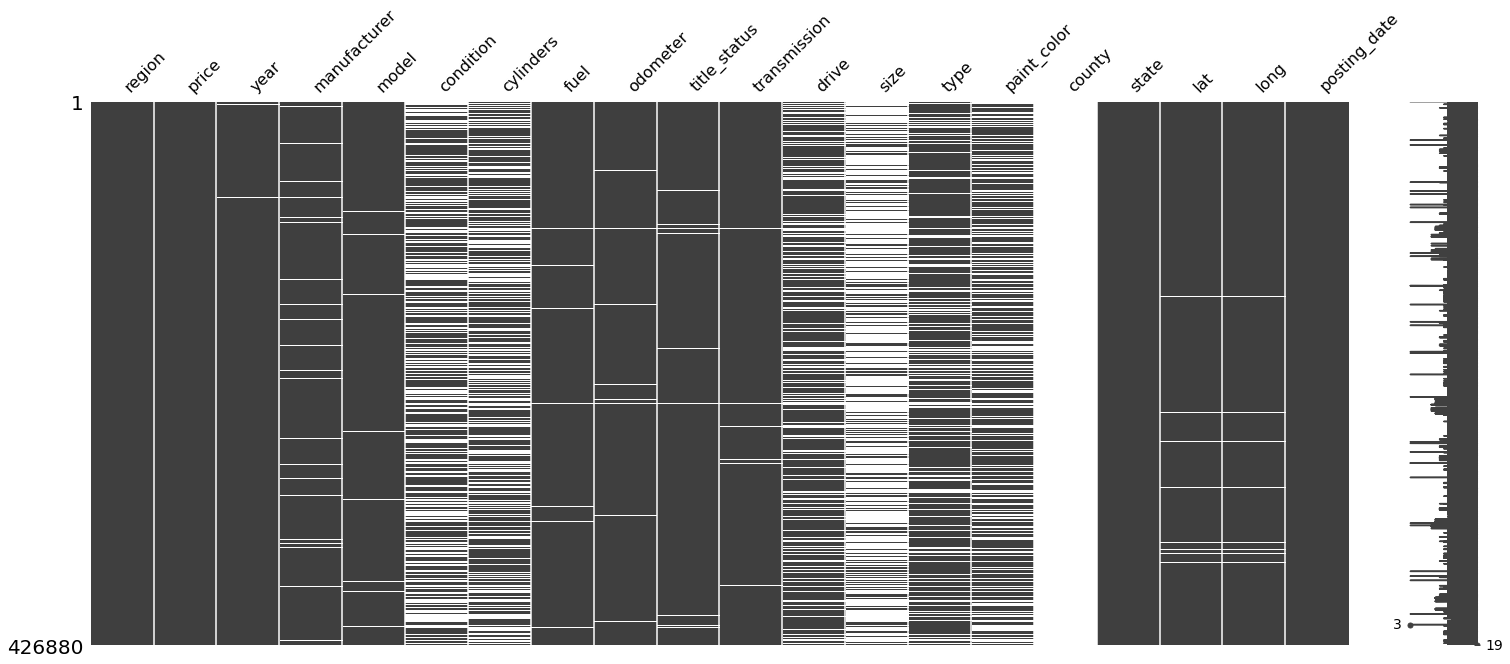

In [ ]:
msno.matrix(df)

The result from the above *isnull()* and *sum()* functions indicated values are frequently missing (NaN) in various columns. We composed a matrix plot illustrating the number of missing values in each column and how many values are missing in each row on the right.

The column that has the highest percentage of missing data is ‘county’, which is completely vacant. The column that has the second highest percentage of missing data is ‘size’, which has more than 70% of missing data. Printing out the unique categorical variables from ‘size’ and ‘type’ columns made us realize that the two columns are representing similar information regarding the dimension of the vehicle. Thus, we dropped both ‘county’ and ‘size’ columns. The rest of the columns’ missing values all account for less than 50%. We decided to not drop any more columns to avoid removing meaningful information.

In [ ]:
#drop not used columns
df.drop(columns =['county', 'size'],inplace=True)

We now work on dropping or fixing missing values on row bases. We will be using *dropna* method. The data frame now has a total of 426880 rows with 18 columns. We now test different thresholds with dropna.

In [ ]:
#checking all possible thresholds
for i in range(13, 18):
      print('thresh hold equals', i, 'gives',df.dropna(thresh=i).shape)

thresh hold equals 13 gives (421030, 18)
thresh hold equals 14 gives (381189, 18)
thresh hold equals 15 gives (359916, 18)
thresh hold equals 16 gives (306297, 18)
thresh hold equals 17 gives (219345, 18)


We decided to use 15 as the threshold since it is seemingly the most efficient without removing too many or too few rows.

In [ ]:
#drop by 15 per row
df.dropna(thresh=15,inplace = True)
df.shape

(359916, 18)

We drew the missing value matrix diagram again and realized that most columns’ missing value weights dropped by more than 10%, which has proven the effectiveness of the above line of code. The majority of the columns still contains some missing value, but none of them are containing more than 35% of missing values. We consider 10% as the minority of the dataset and used it as the threshold for dropping rows that contains a null value.

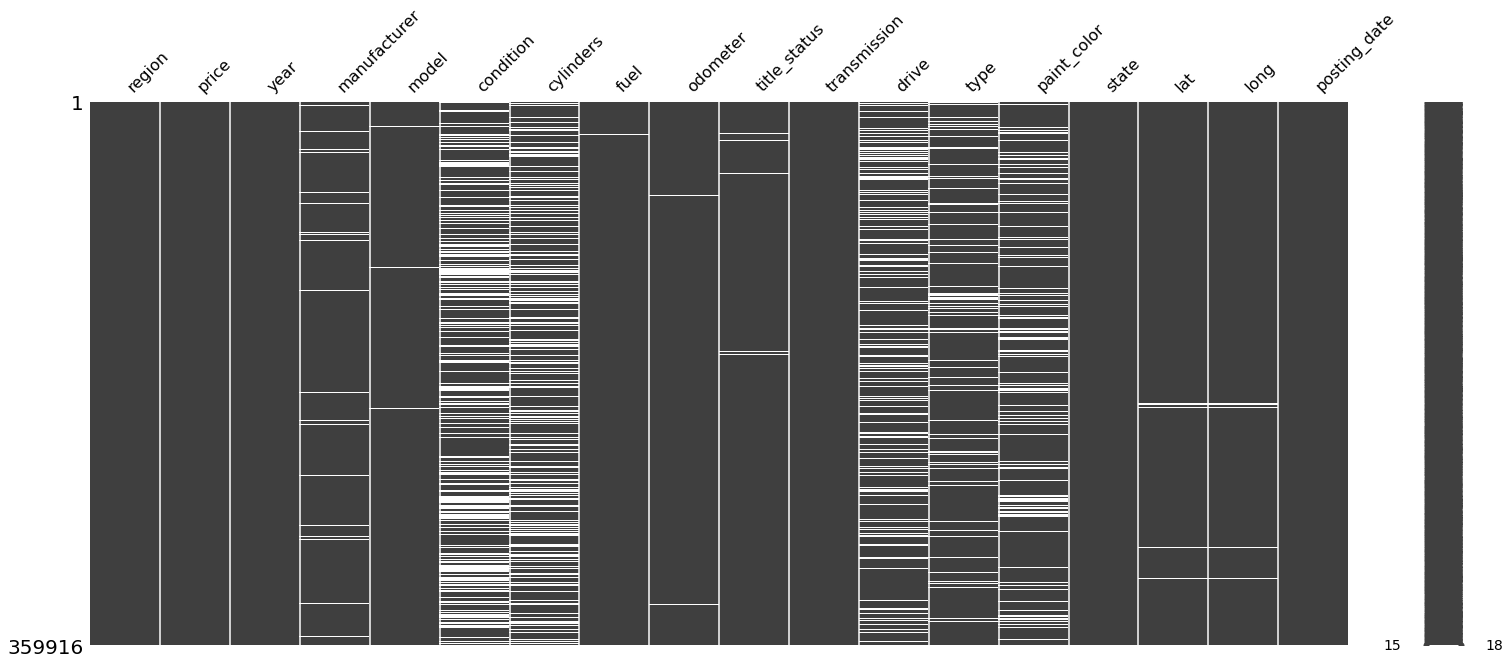

In [ ]:
msno.matrix(df)

In [ ]:
#drop all <=10% null columns
df.dropna(subset=['year','manufacturer','model','fuel','odometer','title_status','transmission','lat','long','type'],inplace = True) 
df.shape

(296642, 18)


The dataset now only has 4 columns with missing values of which two columns have more than 20% missing and the other two columns have less than 20% missing. We decided to treat them differently. Since all 4 columns are categorical, we applied *SimpleImputer* function to fill the columns that have less than 20% missing with the most frequent categorical value and columns that have more than 20% missing with a new categorical value ‘unknown’.

The primary reason we used simpleimputer instead of fillna is that simpleimputer can be incorporated into the pipeline, which we may consider adding for further analysis.

In [ ]:
#impute categorical columns with mode
imputer = SimpleImputer(strategy='most_frequent')
store = ['drive', 'paint_color']

imputer.fit(df[store])
temp = imputer.transform(df[store])
drive_color = pd.DataFrame(temp, columns=df[store].columns,
                                   index=df[store].index)
df['drive'] = drive_color['drive'].values
df['paint_color'] = drive_color['paint_color'].values

df.isnull().sum()

region              0
price               0
year                0
manufacturer        0
model               0
condition       94457
cylinders       98580
fuel                0
odometer            0
title_status        0
transmission        0
drive               0
type                0
paint_color         0
state               0
lat                 0
long                0
posting_date        0
dtype: int64

In [ ]:
#impute categorical columns with new category
imputer = SimpleImputer(strategy = 'constant', fill_value = 'unknown')
store = ['condition', 'cylinders']

imputer.fit(df[store])
temp = imputer.transform(df[store])
drive_color = pd.DataFrame(temp, columns=df[store].columns,
                                   index=df[store].index)
df['condition'] = drive_color['condition'].values
df['cylinders'] = drive_color['cylinders'].values

df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

Finally, we print the count of NaN in the dataset and the result was 0.


After cleaning the missing values, we encountered another problem. Price, which is our dependent variable, contains many corrupted data within it. Since the dataset was directly retrieved from craiglist.com, since of the prices listed online were 0, monthly payment, down payment, or clickbait (prices such as 1234567 and 9999999). The difficulty is that a modern vehicle may be listed at \$5,000 for its down payment while another vehicle from 1980 can be listed at $5,000 for its full price. We also ran a keyword search from the previously dropped ‘description’ column but failed. (We searched for keywords ‘monthly’, and ‘down payment’, but most instances contain such words).

Our first approach is to manually determine the lower bound and upper bound for reasonable prices. After reading the sorted raw dataset, we made the lower bound 20 and the upper bound 400,000, which our team believes can remove most of the ‘clickbait’ instance.

We first checked % of recordings which have a price lower than 20 and higher than 400,000.

In [ ]:
#check outlier range
print(
'Percecnt of recording which has price less or equal to 20 is', round(df[(df[['price']] <= 20).all(axis=1)].shape[0]*100/df.shape[0],3),'%',
'Percecnt of recording which has price higher or equal to 400000 is',round(df[(df[['price']] >= 400000).all(axis=1)].shape[0]*100/df.shape[0],3),'%'
)

Percecnt of recording which has price less or equal to 20 is 7.046 % Percecnt of recording which has price higher or equal to 400000 is 0.004 %


In [ ]:
#select listing with 20 < price < 400000 
df = df[(df[['price']] > 20).all(axis=1)]
df = df[(df[['price']] < 400000).all(axis=1)]
print(df['price'].min(),df['price'].max())
df.shape

21 349999


(275728, 18)

Then we removed the outliers using the typical 1.5 times IQR method.


We first checked % of recordings that are outliers.

In [ ]:
#use IQR methods to drop price outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1   

print('Percent of outliers', round((df[((df[['price']] > (Q3 + 1.5 *IQR)) | (df[['price']] < (Q1 - 1.5 * IQR))) .all(axis=1)].shape[0])*100/df.shape[0],3),'%')

Percent of outliers 1.443 %


In [ ]:
filter = (df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 *IQR)
df = df.loc[filter] 

Through researching monthly payments and down payments, we found the third approach to cleaning the down payment. The down payment was usually 10% for used vehicles. Typically, a down payment is at least 10% of the full price of a used vehicle. Therefore, We first found the median price of vehicles each year. (The distribution of prices is highly right-skewed, so the median is a better parameter than the mean.). We dropped rows where the price is less than 10% of the median because they are more likely to be down payment or monthly payment.

In [ ]:
#drop listing smaller than 10% of average price in a listing
#we identify them as down payment
year_avg = df.groupby('year')['price'].median()
df_1 = pd.concat([year_avg], axis=1).reset_index()
df_1.columns = ['year','MedPrice']
df['Year_Med_price'] = df['year'].map(df_1.set_index('year')['MedPrice'])
df['Price_Higher_than_10%_Med_Price'] = df['price']> df['Year_Med_price']*0.1

print('Number of vehicles whose price is lower than 10% of median price',(df[df['Price_Higher_than_10%_Med_Price'] != True].shape[0]))

df['Price_Higher_than_10%_Med_Price'].value_counts()
df = df[df['Price_Higher_than_10%_Med_Price'] == True]
df.sort_values(by=['price'])
pd.options.mode.chained_assignment = None # getting rid of warining

Number of vehicles whose price is lower than 10% of median price 5699


<ipython-input-20-b636315bcc09>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_Med_price'] = df['year'].map(df_1.set_index('year')['MedPrice'])
<ipython-input-20-b636315bcc09>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price_Higher_than_10%_Med_Price'] = df['price']> df['Year_Med_price']*0.1


This is our prepared and cleaned dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266050 entries, 27 to 426879
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   region                           266050 non-null  object 
 1   price                            266050 non-null  int64  
 2   year                             266050 non-null  float64
 3   manufacturer                     266050 non-null  object 
 4   model                            266050 non-null  object 
 5   condition                        266050 non-null  object 
 6   cylinders                        266050 non-null  object 
 7   fuel                             266050 non-null  object 
 8   odometer                         266050 non-null  float64
 9   title_status                     266050 non-null  object 
 10  transmission                     266050 non-null  object 
 11  drive                            266050 non-null  object 
 12  t

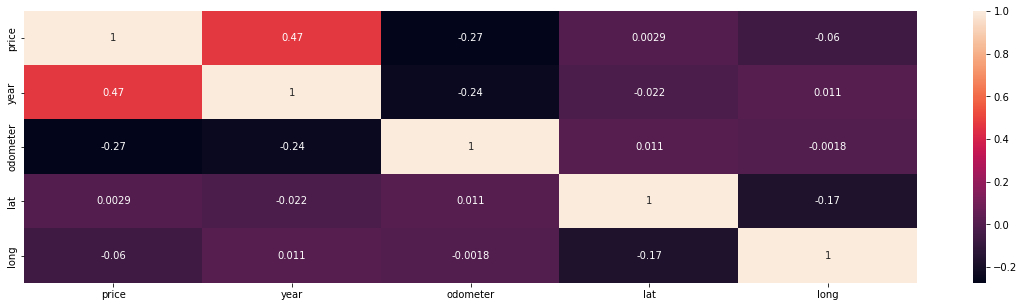

In [ ]:
#Heatmap of the correlation matrix
corr = df.drop(['Year_Med_price','Price_Higher_than_10%_Med_Price'], axis=1).corr()
corr
plt.figure(figsize=(20, 5))
sns.heatmap(corr, annot=True)

***
## Exploratary Analysis


### Part 1: Exploratary

Start the exploration from geographical distribution, vehicles market and price variation. 

#### **1. Geographical distribution**
In this dataset, there are more used cars listed on the east coast compared to the rest of the United States. In the following graph, the size of the marker represents the number of listing in a region, and the density of color represents the average price of used cars in that region

In [ ]:
#graph geographical distribution
color_scale = [(0, 'white'), (1,'blue')]
data_map = df[['region','lat','long', 'price']]
new_map = df.groupby('region') \
       .agg(count=('price', 'size'), lat=('lat', 'mean'),long=('long', 'mean'),price=('price', 'mean')) \
       .reset_index()

fig = px.scatter_mapbox(new_map, 
                        lat="lat", 
                        lon="long", 
                        hover_name="region",
                        hover_data=["price", "count"],
                        color="price",
                        color_continuous_scale=color_scale,
                        size="count", 
                        zoom=3,
                        height=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


<center>
<img src="https://drive.google.com/uc?id=1oqPZaKU-g8R9UmmoxQevoEHd42Rkhky-" width="8000", align='center'>
</div>




#### **2. Average used vehicles price over past 10 model years and correlation**


*   Before we dive into the analysis of each variable, we first need to explore the whole market of used vehicles. The year of the dataset is from 1990 to 2022. To understand the market of used vehicles, we only extract the past 10 years to compare the average vehicle price, as 10 years was able to display an obvious pattern. 
*   The average price kept increasing within the past 10 years which means used **vehicles with fewer years will have a higher price**. This observation also matches reality.



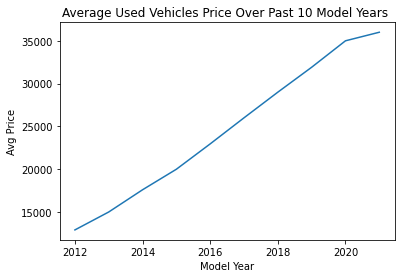

In [ ]:
#check average price through out all model years
year = df[df['year'] != 2022]
average_price = year.groupby("year").agg({'price': 'median'}).sort_values(by='year',ascending=False).head(10)
price_df = pd.DataFrame(average_price)
average_price_over_past_10_years = sns.lineplot(x='year', y='price', data=price_df,ci= None) \
                                .set(title='Average Used Vehicles Price Over Past 10 Model Years ', ylabel='Avg Price', xlabel='Model Year')

##### *Do price and year have a positive correlation?*

Yes. Price and year have a positive 0.44 correlation coefficient according to the correlation matrix, which indicates that there is likely a relatively strong positive correlation between price and year.

In [ ]:
#check correlation
corr = df.corr()
corr

,price,year,odometer,lat,long,Year_Med_price,Price_Higher_than_10%_Med_Price
price,1.000000,0.467907,-0.273411,0.002889,-0.059858,0.689692,NaN
year,0.467907,1.000000,-0.237031,-0.021756,0.010976,0.668996,NaN
odometer,-0.273411,-0.237031,1.000000,0.010641,-0.001754,-0.324184,NaN
lat,0.002889,-0.021756,0.010641,1.000000,-0.169616,-0.033287,NaN
long,-0.059858,0.010976,-0.001754,-0.169616,1.000000,-0.009427,NaN
Year_Med_price,0.689692,0.668996,-0.324184,-0.033287,-0.009427,1.000000,NaN
Price_Higher_than_10%_Med_Price,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **3. What is the variation of price?**

Most of the price of used cars are concentrated at 0-30,000. When the price of used cars is between 5,000 and 15,000, the amount of used cars is higher than 50000. When the price of the car is higher than 40,000, the amount of used cars decreases sharply from about 10000 to less than 5,000.

Text(0, 0.5, 'Count')

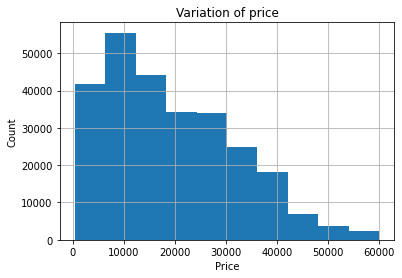

In [ ]:
#check price variation
price = pd.to_numeric(df['price']).hist(histtype = 'barstacked')
plt.title('Variation of price')
price.set_xlabel('Price')
price.set_ylabel('Count')

### Part 2: Data Exploring

We first start to explore each variable independently, figuring out what each variable is consisted of, and if it has a correlation with the price variable. 

#### **1. Which manufacturer has the highest average price? Which has the lowest?**

**Tesla has the highest average price**, 36845 dollars, while **Mercury has the lowest average price** which is only 5572 dollars. However, we should notice that luxury cars such as Land Rover, Aston Martin and Ferrari, which should have a much higher average price, may have experienced a lower average price due to the limited sample size.

In [ ]:
#number of car listed by manufacturer
print(df.manufacturer.value_counts())

ford               42771
chevrolet          33784
toyota             23574
honda              14378
nissan             12375
jeep               12338
ram                10943
gmc                10484
bmw                10124
dodge               8101
mercedes-benz       7166
hyundai             6824
volkswagen          6708
subaru              6438
lexus               5989
audi                5631
kia                 5486
acura               4800
cadillac            4704
chrysler            3888
mazda               3852
buick               3797
infiniti            3774
lincoln             3048
volvo               2468
mitsubishi          2380
mini                1818
jaguar              1555
pontiac             1340
rover               1246
alfa-romeo           763
porsche              756
mercury              755
tesla                655
saturn               640
fiat                 586
harley-davidson       61
datsun                32
land rover             9
aston-martin           5


In [ ]:
#each manufacturer's average price
df[['price', 'manufacturer']].groupby('manufacturer').mean().sort_values(by = 'price')

,price
manufacturer,
mercury,5737.826490
saturn,5747.253125
pontiac,8540.194776
chrysler,11328.676183
honda,12549.848588
hyundai,12903.828107
kia,13682.391542
fiat,14059.662116
harley-davidson,14196.491803


#### **2. Does color affect the average price and the amounts of cars?**

We can see that all of the unique colors in the dataset and the two colors with the highest average prices are black and white, followed by brighter shades of red, orange, and yellow.

In [ ]:
#check all color
df['paint_color'].unique()

array(['white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [ ]:
#average price for each color
df[['price', 'paint_color']].groupby('paint_color').mean().sort_values(by = 'price', ascending=False)

,price
paint_color,
white,21685.049525
black,21472.417567
orange,19261.399435
red,19222.421491
yellow,18772.560886
blue,17261.489707
silver,16851.125704
brown,16244.394851
custom,16011.383953


The graph shows that **white cars are the most numerous used cars**. Although the average price of black cars is higher than that of white cars, the number of black cars is only half of that of white cars. **The number order of colors other than black and white does not seem to be significantly related to their average price order**.

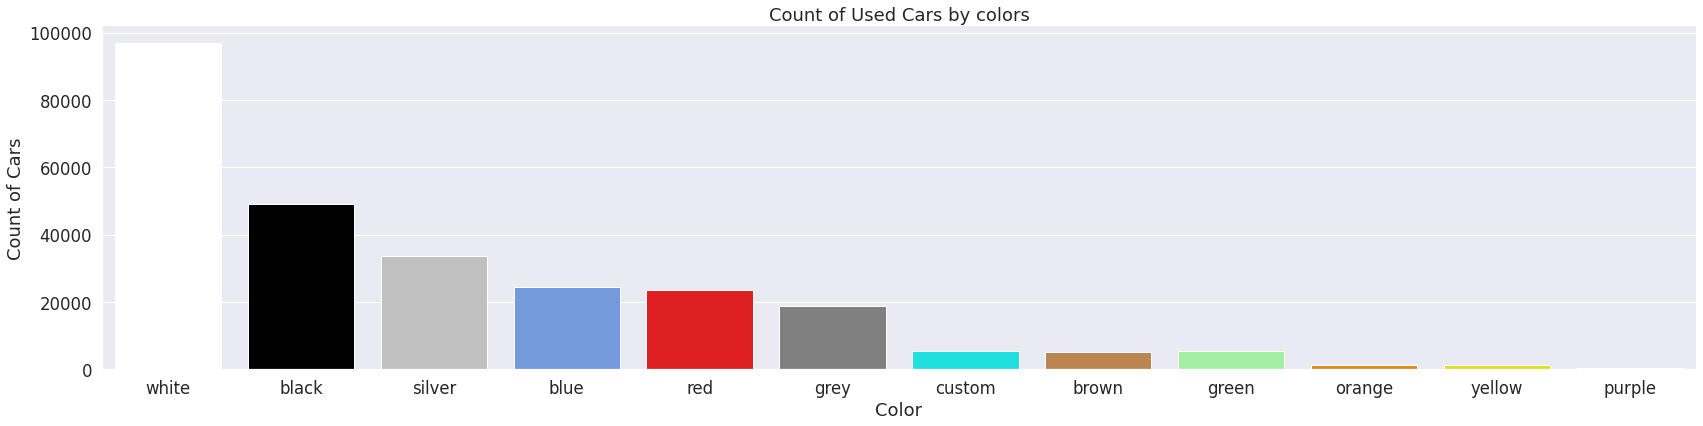

In [68]:
#graph out the number of listings per color
colors = {'white': '#FFFFFF', 'blue': '#6495ED', 'red':'#FF0000', 'black':'#000000' , 'silver':'#C0C0C0', 'grey': '#808080','brown':'#CD853F', 'yellow':'#FFFF00', 'orange':'#FF8C00','green': '#98FB98',  'custom':'#00FFFF' ,  'purple':'#DA70D6'}
custom_palette_count = ['white', 'black','silver','blue', 'red',   'grey', 'custom','brown', 'green', 'orange','yellow',   'purple']
sns.catplot(x='paint_color', data=df, kind='count', height=6, aspect=4, order=custom_palette_count, palette=colors).set(title='Count of Used Cars by colors')
sns.set(font_scale=1.5)
plt.xlabel("Color")
plt.ylabel("Count of Cars")
sns.set_style("darkgrid")

**Price variation in terms of color and manufacturer**

The data frame about the average price by manufacturer and color shows that **the top 10 manufacturers which have the most expensive used cars have no color preference**.

The data frame about the amounts of used cars by manufacturer and color shows that the top 10 manufacturers which have the highest amounts of used cars sell white and black cars.
The graph presents that the most used car is Ford's white car, followed by Chevrolet. These two companies are also the companies that sell the most black cars.

In [ ]:
# numbers of used cars by manufacturer and color
c = df.groupby(['paint_color','manufacturer']).agg(['count']).rename(columns={'count': 'count'})
c.reset_index(inplace=True)
c = c[['paint_color','manufacturer','price']]
c1 = c.groupby(['paint_color']).apply(lambda x: x.sort_values([('price', 'count')], ascending = False)).reset_index(drop=True)
c1.sort_values([('price', 'count')], ascending = False).reset_index(drop=True).head(10)

,paint_color,manufacturer,price
,,,count
0,white,ford,18402
1,white,chevrolet,12538
2,white,toyota,8045
3,black,ford,6539
4,black,chevrolet,5675
5,white,ram,5638
6,white,gmc,4549
7,red,chevrolet,4244
8,silver,toyota,4230


#### **3. Are there noticeable differences in price between each fuel type?**

Yes. Diesel cars have the highest average price, then comes electric cars(if ignoring the 'other' category). Gas and hybrid cars have much cheaper price, which is more than 34% lower than electric. 

In [ ]:
#average price for fuel types
df[['price', 'fuel']].groupby('fuel').mean().sort_values(by = 'price', ascending=False)

,price
fuel,
diesel,30841.609326
other,27663.080518
electric,25993.564165
gas,18015.197890
hybrid,16442.675117


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

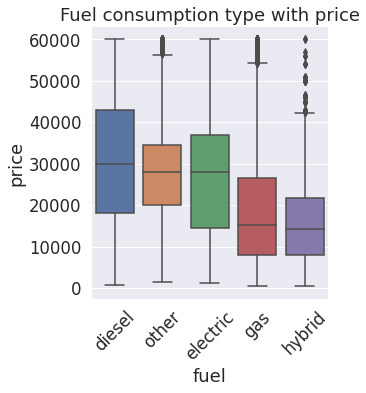

In [ ]:
#box plot for fuel types
sns.catplot(x='fuel', y='price', data=df, kind='box', order = ['diesel', 'other', 'electric', 'gas', 'hybrid']).set(title='Fuel consumption type with price')
plt.xticks(rotation=45)

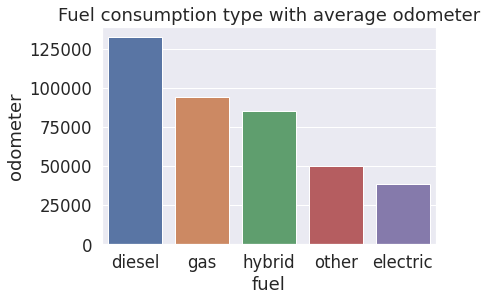

In [ ]:
#check average odometer by fuel type
average_odometer = df.groupby("fuel").agg({'odometer': 'mean'}).sort_values(by='odometer',ascending=False).reset_index()
odometer_df = pd.DataFrame(average_odometer)
fuel_w_top_odometer = sns.barplot(data=odometer_df, x="fuel", y="odometer").set(title='Fuel consumption type with average odometer')

#### **4. What is the influence of odometer on price?**

All used cars priced above 30,000 have very small odometers, and most of the used cars here also have low odometers. This is very reasonable. After all, buyers who buy second-hand cars must hope that the condition of the cars can be as close to the new cars as possible, that is, with fewer odometers. The cars that can meet the needs of customers deserve a high price.

<Figure size 1080x1080 with 0 Axes>

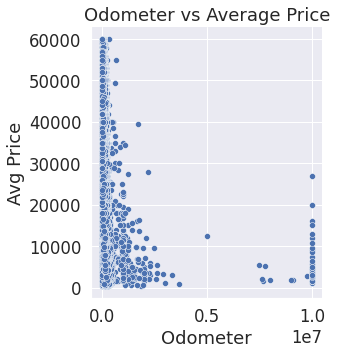

In [ ]:
#average price by odometer 
plt.figure(figsize=(15,15))
odometer = sns.relplot(x='odometer',y='price', kind='scatter', data=df) \
              .set(title='Odometer vs Average Price', ylabel='Avg Price', xlabel='Odometer')

#### **5. What is the relationship between vehicle type and price?**

We explore what kinds of vehicles with their average price in the dataset. We found that pickup truck has the highest average price and mini-van has the lowest average price. The most common vehicle type on the road SUV and sedans all have an average price of around \$1,5000.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

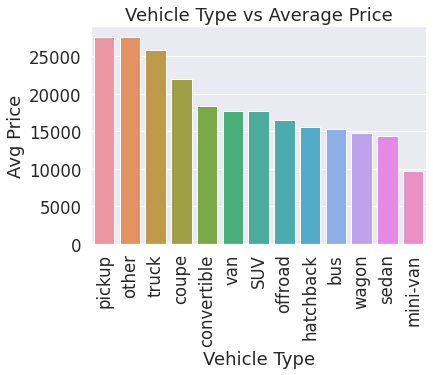

In [ ]:
#graph average price by vehicle type
av_price = df[['type','price']].groupby(['type'])['price'].mean().reset_index()
av_p_df = pd.DataFrame(av_price)
car_type = sns.barplot(data=av_p_df, x="type", y="price",order =av_p_df.sort_values("price",ascending = False).type, ci=None) \
              .set(title='Vehicle Type vs Average Price', ylabel='Avg Price', xlabel='Vehicle Type')
plt.xticks(rotation=90)



#### **6. How does engine and transmission layout affect the pricing of a used vehicle?**

4-wheel drive used vehicles have the highest average price in this dataset. From the graph, 4wd and rwd vehicles have a balanced distribution across most price points, while fwd is more skewed to the right. **For a customer looking for a lower price, front-wheel drive used cars should be the option based on what we found in this dataset**.

In [ ]:
#drive type by average price
temp = df[['drive', 'price']]
gb_mean_d = temp.groupby('drive').mean()
gb_mean_d['price'] = round(gb_mean_d['price'],2)
gb_mean_d = gb_mean_d.rename({'price': 'avg_price'}, axis=1)
gb_mean_d.sort_values(by='avg_price', ascending = False)

,avg_price
drive,
4wd,22919.47
rwd,20485.06
fwd,12902.97


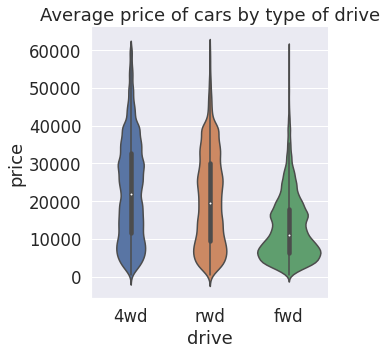

In [ ]:
#violen plot
avg_price_drive = df.groupby("drive")['price'].mean()

sns.catplot(x = 'drive', y = 'price', kind = 'violin', data = df, showfliers=False).set(title='Average price of cars by type of drive')

In this dataset, another transmission type has the highest average price. And the cheapest average price is the manual transmission vehicles. **For a customer looking for a lower price, manual transmission used cars should be the option based on what we found.**

In [ ]:
#transmission by average price
temp = df[['transmission', 'price']]
gb_mean_t = temp.groupby('transmission').mean()
gb_mean_t['price'] = round(gb_mean_t['price'],2)
gb_mean_t = gb_mean_t.rename({'price': 'avg_price'}, axis=1)
gb_mean_t.sort_values(by='avg_price', ascending = False)

,avg_price
transmission,
other,28836.84
automatic,17154.35
manual,14089.73


#### **7. Does title status affect the listing price of a used vehicle?**

In this dataset, clean plates have a higher avg_price while missing plates and parts-only vehicles are way cheaper than other types. From the graph, we can see that a vehicle with a clean title status and an old model year could be costly. Years around late 1990 is the base of the curve, and the price starts to climb as time moves forwards. This finding makes sense because most customers demand a clean title status as the baseline for purchasing a used vehicle. 

In [ ]:
#title_status by average price
temp = df[['title_status', 'price']]
gb_mean_dt = temp.groupby('title_status').mean()
gb_mean_dt['price'] = round(gb_mean_dt['price'],2)
gb_mean_dt = gb_mean_dt.rename({'price': 'avg_price'}, axis=1)
gb_mean_dt.sort_values(by='avg_price', ascending = False)

,avg_price
title_status,
lien,20648.14
clean,19714.09
rebuilt,13486.53
salvage,10219.90
missing,5705.94
parts only,4742.21


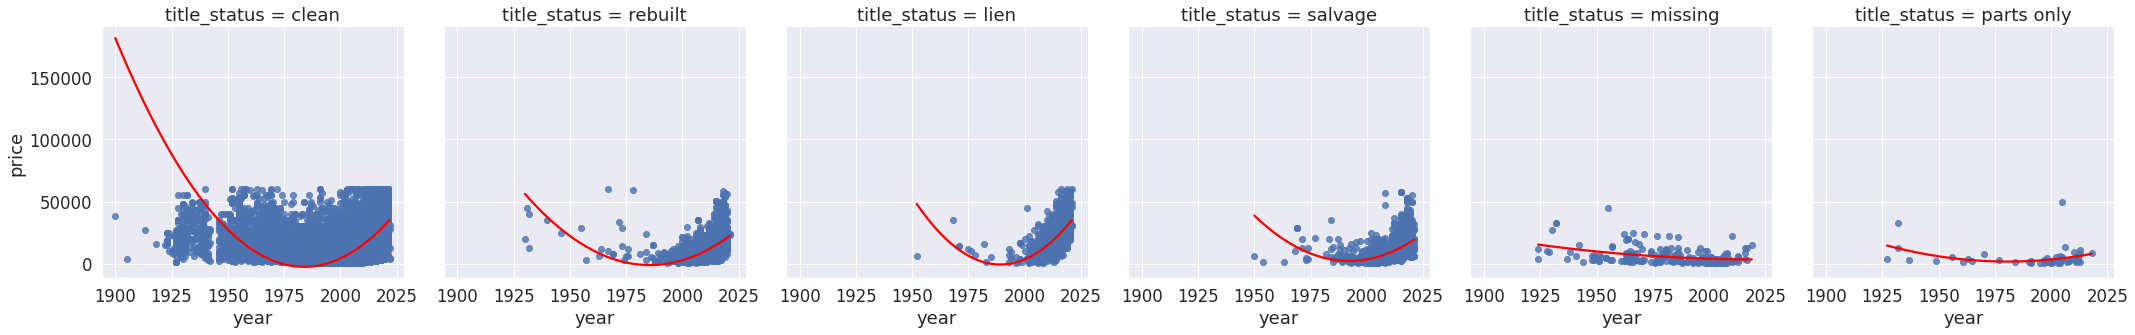

In [ ]:
#scatter plot with regression line
sns.lmplot(x="year", y="price", data=df, order=2, ci=None, line_kws={'color': 'red'},col='title_status')
plt.show()

### Part 3: Deeper dive into manufacturers

Based on the understanding of the correlation between price and each variable independently, we are going to deeply investigate how the price fluctuates based on each manufacturer in terms of each variable interaction. Therefore people can choose their vehicle based on their preferences. 



####**1. Price, manufacturer and fuel type**

From the table, Jaguar hybrid car models have the highest price. Following by Jaguar electric and Ram hybrid car models. Most of the expensive cars in this dataset have a "Green Energy" (electric/hybrid) fuel type. And From the following five plots, we plot the average pricing distribution for different manufacturers in various fuel types. The other fuel type cars have the highest average price while hybrid and electric average prices between manufacturers have a large range. The majority of manufacturers produced gas fuel vehicles and the range of price is relatively low.

In [ ]:
#manufacturer, fuel type with average price
pfm = df.groupby(['manufacturer','fuel']).agg({'price' : 'mean'}).reset_index(['manufacturer', 'fuel'])
pfm.sort_values(by='price', ascending=False).head(10)

,manufacturer,fuel,price
74,jaguar,hybrid,50990.000000
72,jaguar,electric,49985.000000
134,ram,hybrid,44245.500000
163,volvo,electric,43470.000000
149,tesla,gas,42219.945455
6,aston-martin,gas,42079.000000
136,rover,diesel,40709.843750
21,cadillac,electric,39726.333333
165,volvo,hybrid,39616.470588
120,nissan,diesel,38802.416667


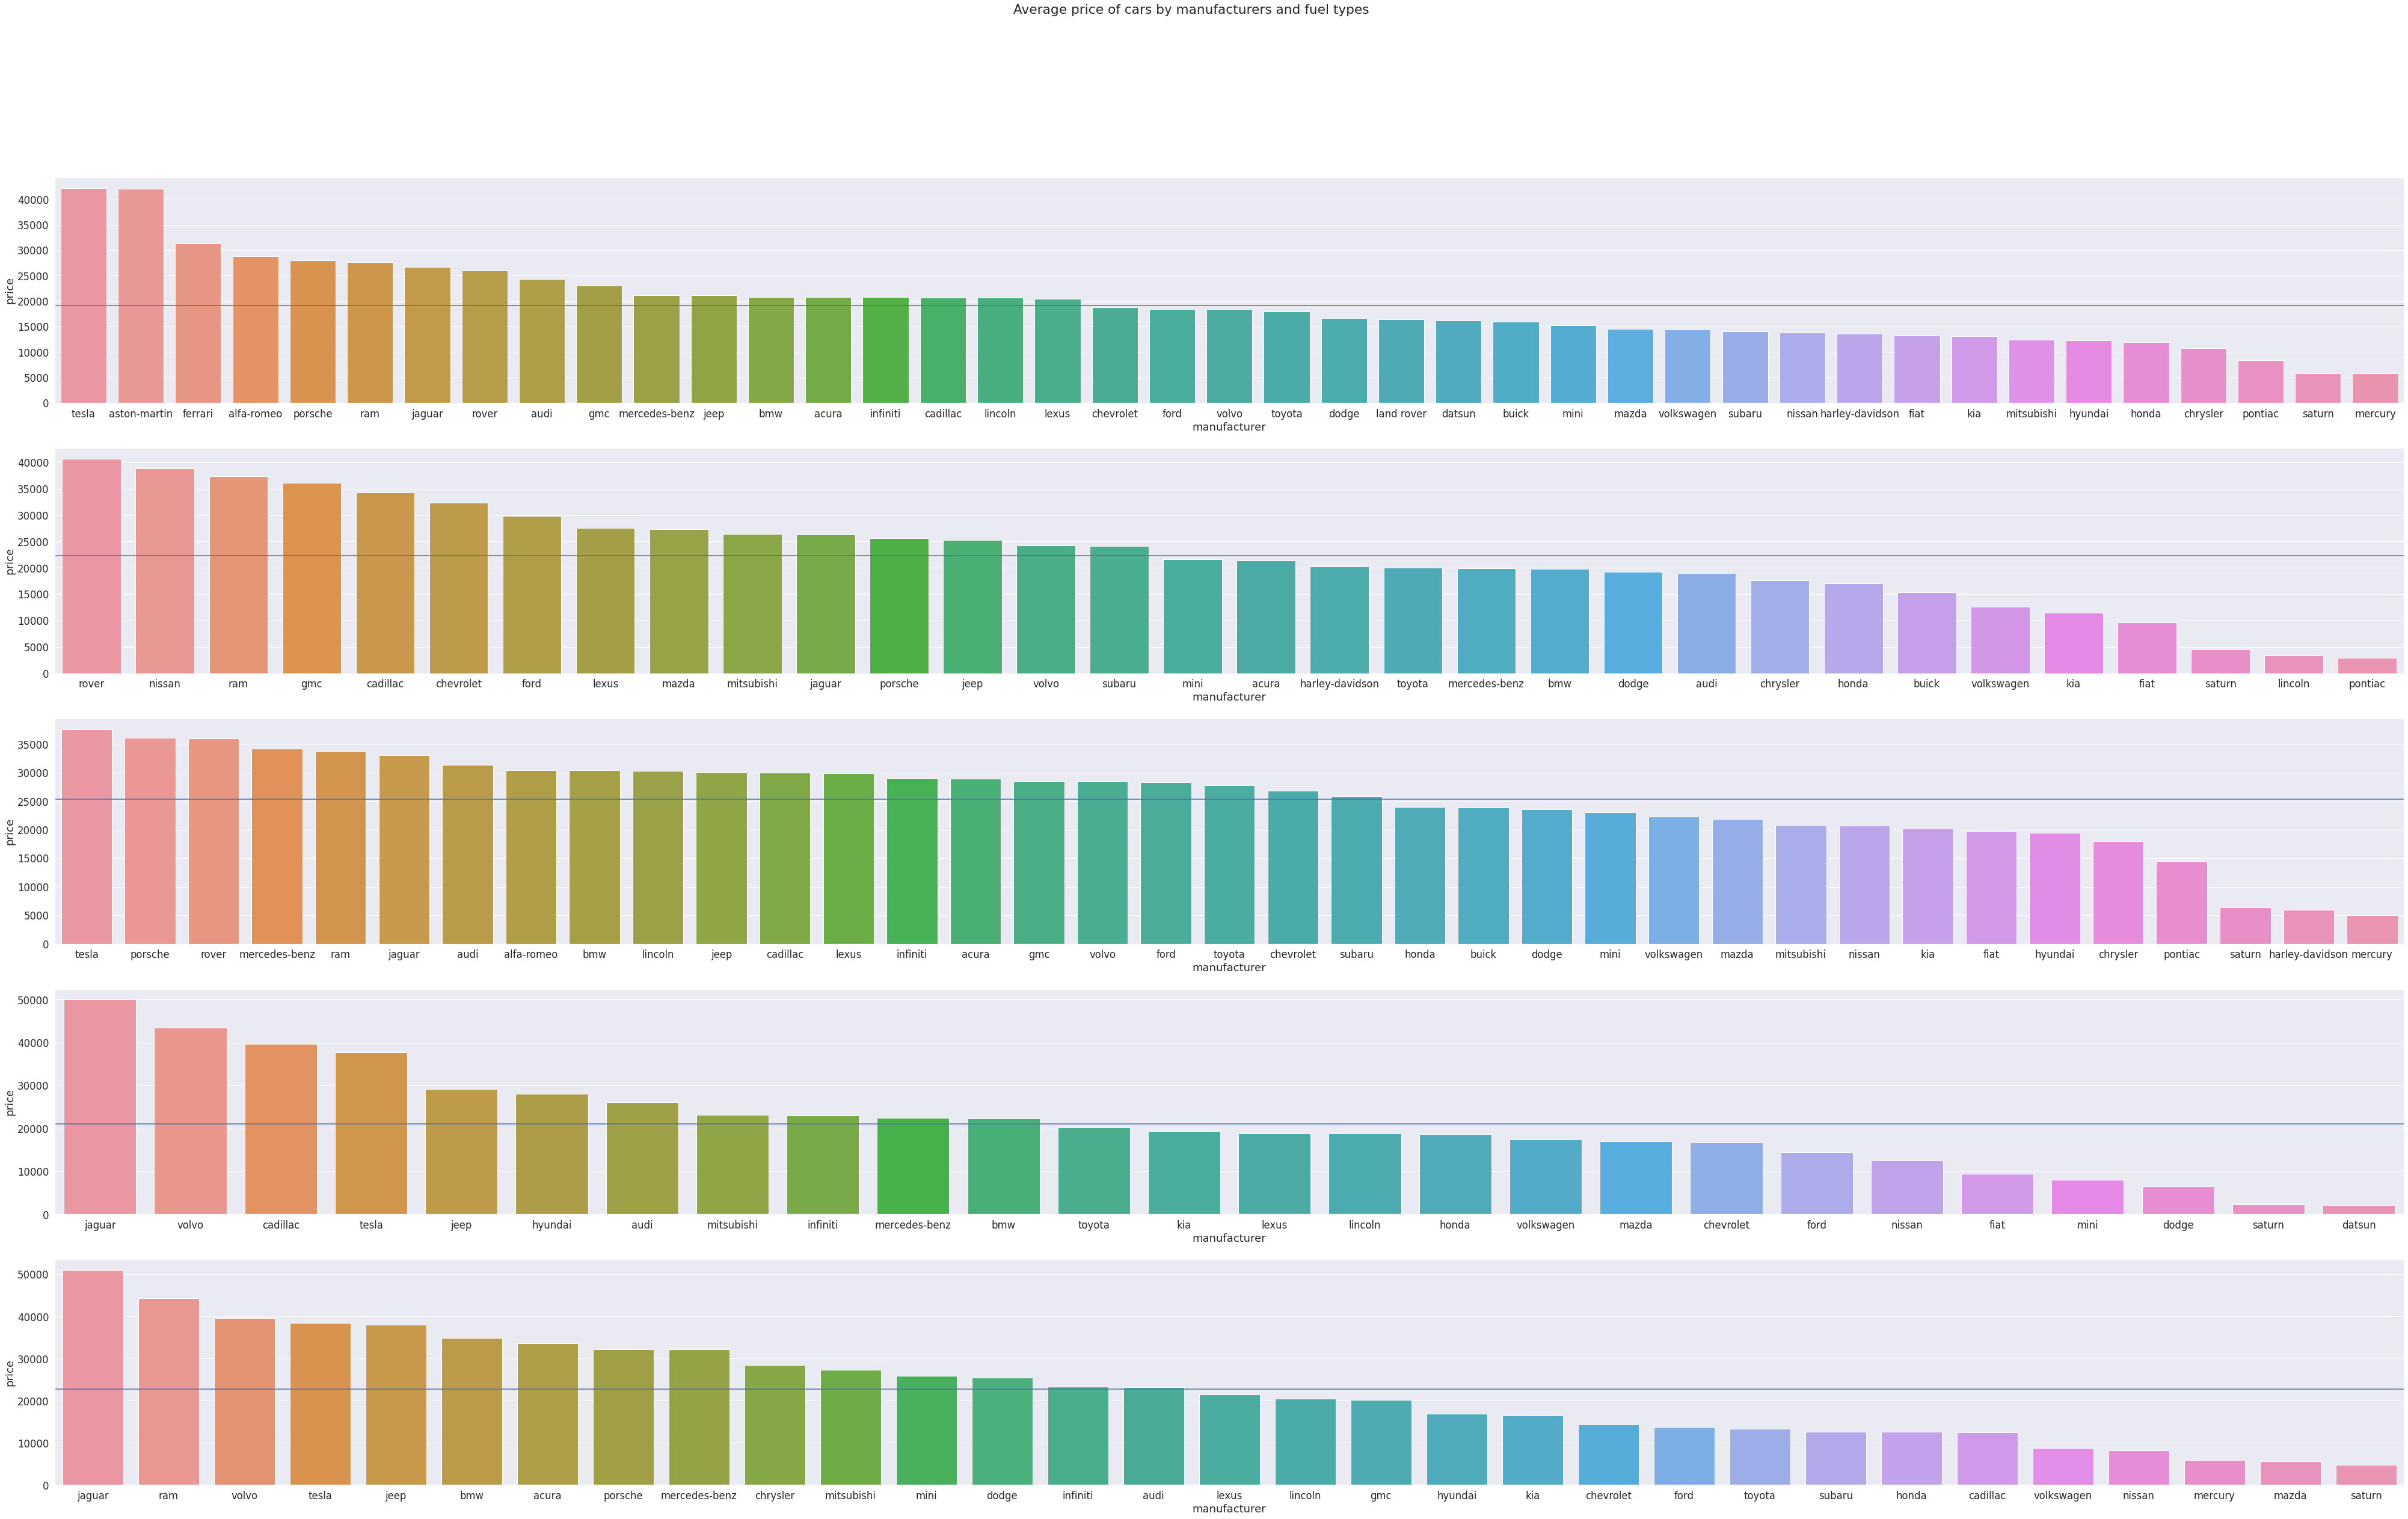

In [ ]:
#graph out sorted bar chart with an average price line
gas= pfm[pfm['fuel']=='gas']
diesel= pfm[pfm['fuel']=='diesel']
other= pfm[pfm['fuel']=='other']
electric= pfm[pfm['fuel']=='electric']
hybrid= pfm[pfm['fuel']=='hybrid']

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(70, 40))
plt.suptitle('Average price of cars by manufacturers and fuel types')

sns.barplot(x = 'manufacturer', y = 'price', data = gas, order =gas.sort_values("price",ascending = False).manufacturer, ax=ax1)
mean1 = gas["price"].mean()
ax1.axhline(mean1)

sns.barplot(x = 'manufacturer', y = 'price', data = diesel, order =diesel.sort_values("price",ascending = False).manufacturer, ax=ax2)
mean2 = diesel["price"].mean()
ax2.axhline(mean2)

sns.barplot(x = 'manufacturer', y = 'price', data = other, order = other.sort_values("price",ascending = False).manufacturer, ax=ax3)
mean3 = other["price"].mean()
ax3.axhline(mean3)

sns.barplot(x = 'manufacturer', y = 'price', data = electric, order = electric.sort_values("price",ascending = False).manufacturer, ax=ax4)
mean4 = electric["price"].mean()
ax4.axhline(mean4)

sns.barplot(x = 'manufacturer', y = 'price', data = hybrid, order = hybrid.sort_values("price",ascending = False).manufacturer, ax=ax5)
mean5 = hybrid["price"].mean()
ax5.axhline(mean5)

plt.show()

####**2. Price, manufacturer and drive**

In [ ]:
# find unique value for each manufacturer
df['manufacturer'].value_counts()

ford               42771
chevrolet          33784
toyota             23574
honda              14378
nissan             12375
jeep               12338
ram                10943
gmc                10484
bmw                10124
dodge               8101
mercedes-benz       7166
hyundai             6824
volkswagen          6708
subaru              6438
lexus               5989
audi                5631
kia                 5486
acura               4800
cadillac            4704
chrysler            3888
mazda               3852
buick               3797
infiniti            3774
lincoln             3048
volvo               2468
mitsubishi          2380
mini                1818
jaguar              1555
pontiac             1340
rover               1246
alfa-romeo           763
porsche              756
mercury              755
tesla                655
saturn               640
fiat                 586
harley-davidson       61
datsun                32
land rover             9
aston-martin           5


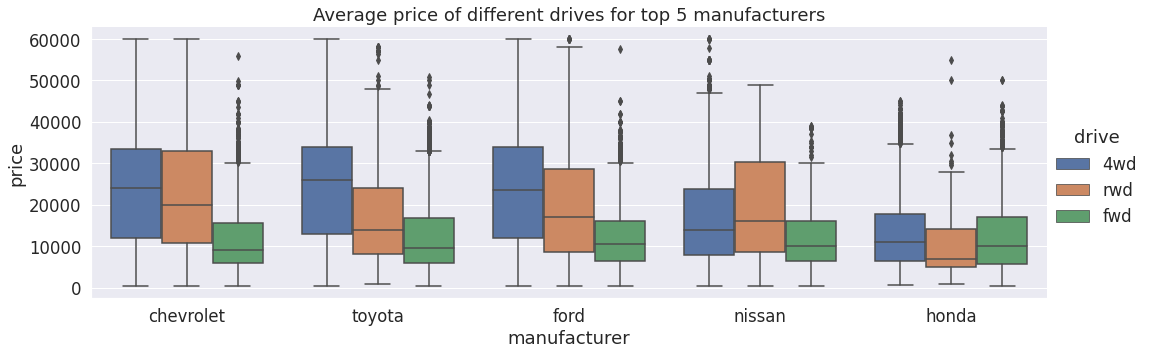

In [ ]:
#box plot for top five most listed manufacturer
top_5_manufacturer = df[(df['manufacturer'] == 'ford') | (df['manufacturer'] == 'chevrolet') | (df['manufacturer'] == 'toyota') | (df['manufacturer'] == 'honda') | (df['manufacturer'] == 'nissan')]
sns.catplot(data=top_5_manufacturer, x='manufacturer', y='price', kind='box', hue='drive', aspect=3).set(title='Average price of different drives for top 5 manufacturers')

The above boxplot presents the average price of different drives for the 5 most common manufacturers. As discussed before, the average price of different drives generally conforms with 4 wheels drive > rear wheels drive > forward wheels drive. However, Nissan here has a higher average price for rear wheel driving. So what about other manufacturers? How many of them have other drives with the highest average price rather than 4 wheel drive?

In [ ]:
#manufacturer, drive type with average price
pmd = df[['price', 'manufacturer', 'drive']]
p = pmd.groupby(['manufacturer', 'drive']).agg({'price':'mean'}).round(2).reset_index().sort_values(by=['manufacturer', 'price'], ascending=[True, False])
p

,manufacturer,drive,price
0,acura,4wd,24703.31
1,acura,fwd,20004.38
2,acura,rwd,8898.19
3,alfa-romeo,4wd,29731.72
5,alfa-romeo,rwd,29461.53
...,...,...,...
111,volkswagen,fwd,13922.59
112,volkswagen,rwd,12046.41
113,volvo,4wd,23494.03
114,volvo,fwd,12662.74


In [ ]:
# selecting drive with highest average price for each manufacturer
p_max = p.groupby(['manufacturer'],as_index=False).apply(lambda x:x.iloc[x["price"].argmax(),:])
p_max

,manufacturer,drive,price
0,acura,4wd,24703.31
1,alfa-romeo,4wd,29731.72
2,aston-martin,rwd,42079.00
3,audi,4wd,26013.59
4,bmw,4wd,22291.68
5,buick,4wd,20131.17
6,cadillac,4wd,25446.44
7,chevrolet,4wd,23482.06
8,chrysler,rwd,15323.54
9,datsun,4wd,19300.00


In [ ]:
p_max['drive'].value_counts()

4wd    24
rwd    14
fwd     3
Name: drive, dtype: int64

So we can see that 24 manufacturers have highest average price for their 4 wheels drive cars, 14 manufacturers have highest average price for rear wheels drive products, only 3 have highest average price for forward drive wheels cars.

####**3. Price, manufacturer and vehicle type**



We are now going to **find the interaction of the price fluctuation in terms of type and manufacturer**. We first find out the type of vehicles with lower prices and lower traveled odometers, then further find out which manufacturer of this type of cars are worth buying. 


*   Both sedans and minivans have low prices compared to other types of cars. However, as the minivan has much larger traveled odometers compared to sedans, therefore sedan is more recommended with a lower price and odometer. 
*   Saturn has the lowest average price among sedans. Therefore **Sedans with Saturn is considered the "newest" one with a low price**.

<ipython-input-50-8c7fc4213223>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



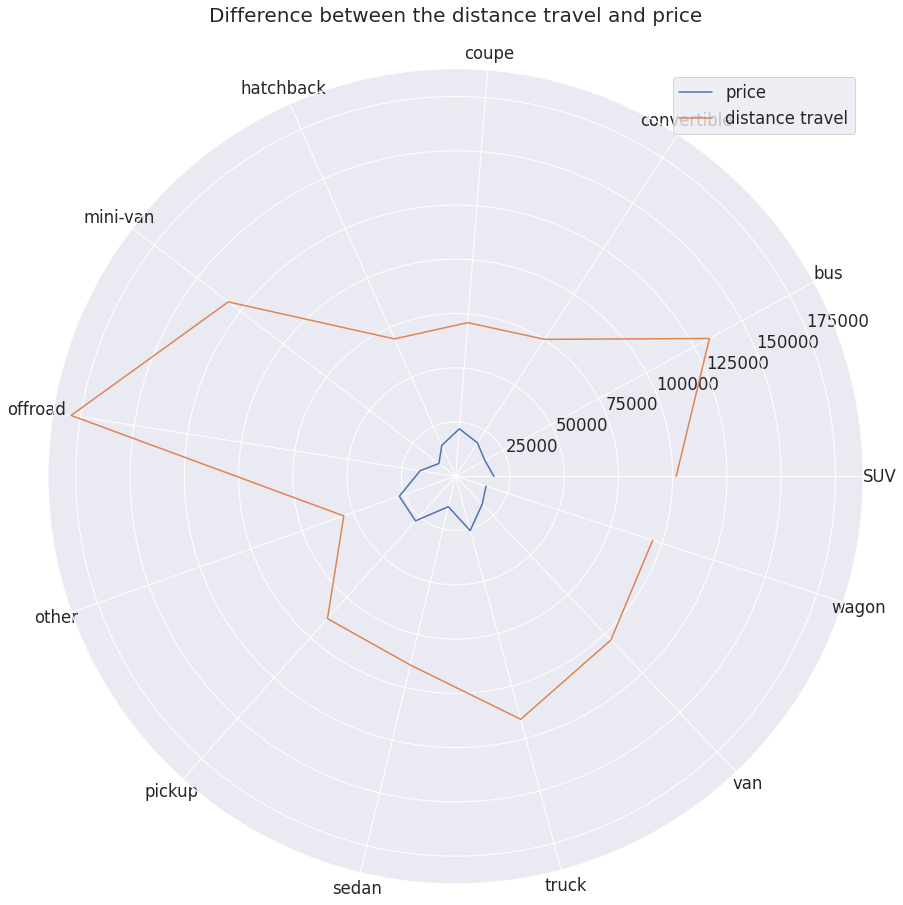

In [ ]:
#odometer, vehicle type with average price
av_price = df[['type','price','odometer']].groupby(['type'])['price','odometer'].mean().reset_index()
av_p_df = pd.DataFrame(av_price)

av_p_df

brand = av_p_df['type']
price = av_p_df['price']
odometer = av_p_df['odometer']
label_loc = np.linspace(start=0, stop=1.9 * np.pi, num=len(price))

figure(figsize=(15, 15))
plt.subplot(polar=True)
plt.plot(label_loc, price, label='price')
plt.plot(label_loc, odometer, label='distance travel')

plt.title('Difference between the distance travel and price', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=brand)
plt.legend()
plt.show()

Find the manufacturer with lowest average price among sedan, and plot the top 5

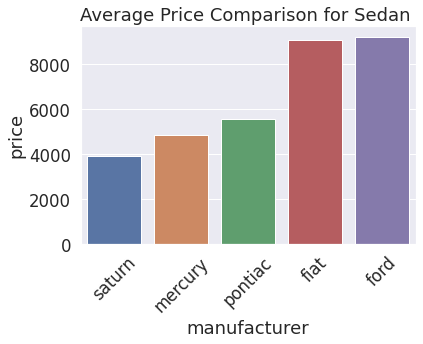

<Figure size 1080x720 with 0 Axes>

In [ ]:
#focus on sedan type
#plot the cheapest five manufacturers
sedan = df[df['type'] == 'sedan']
sedan = sedan[['type','price', 'manufacturer']]
sedan_m = sedan.groupby(['manufacturer'])['price'].mean().reset_index().sort_values(by=['price'],ascending=[True]).head(5)
sedan_m = pd.DataFrame(sedan_m)

g = sns.barplot(data=sedan_m, x="manufacturer", y="price")

g.set_title('Average Price Comparison for Sedan ')
plt.xticks(rotation = 45)
plt.figure(figsize=(15, 10))
plt.show()

***
## Regression Analysis

### Preprocessing, Sampling, and Traintest Split

After all the EDA analysis, we decided to run a couple of regression models and observe how each variables' coefficient affect our dependent variable. Therefore customers can choose their vehicle based on quantitive evaluations not just their intuition.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266050 entries, 27 to 426879
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   region                           266050 non-null  object 
 1   price                            266050 non-null  int64  
 2   year                             266050 non-null  float64
 3   manufacturer                     266050 non-null  object 
 4   model                            266050 non-null  object 
 5   condition                        266050 non-null  object 
 6   cylinders                        266050 non-null  object 
 7   fuel                             266050 non-null  object 
 8   odometer                         266050 non-null  float64
 9   title_status                     266050 non-null  object 
 10  transmission                     266050 non-null  object 
 11  drive                            266050 non-null  object 
 12  t

In [ ]:
#drop not useful columns
df.drop(columns=['Year_Med_price','Price_Higher_than_10%_Med_Price'],inplace= True)

In [ ]:
df.nunique(axis=0)

region             404
price            11250
year               103
manufacturer        41
model            16877
condition            7
cylinders            9
fuel                 5
odometer         76724
title_status         6
transmission         3
drive                3
type                13
paint_color         12
state               51
lat              37480
long             37790
posting_date    238009
dtype: int64

In [ ]:
#check posting date range
df['posting_date'].max(),df['posting_date'].min()

('2021-05-04T23:59:45-0400', '2021-04-04T00:10:40-0700')

Since the time range for the posting dates is only one month, we think it will not be a primary influencing factor over price, so we decided to drop it for the regression analysis.

In [ ]:
#drop posting_date since not represent anything
df.drop(columns=['posting_date'],inplace= True)

Moreover, since our data set is way too big to process as there are nearly 17k unique values for the model, we decided to take random samples of 9270 listings and build the model accordingly. Then we used OneHotEncoder to expand all categorical columns. In the end, the dataset contains 3606 binary categorical columns.

In [ ]:
#random sample portion of the dataset
df_s = df.sample(n = 9270, random_state=16)

In [ ]:
#OneHotEncoder
ohe = OneHotEncoder(
    categories='auto',
    drop=None, 
    handle_unknown='error'
)  

df_cat = df_s.select_dtypes(include=object)
df_num = df_s.select_dtypes(include= np.number)

In [ ]:
#fit and transform
transformed = ohe.fit_transform(df_cat)
df_cat = pd.DataFrame(transformed.toarray())
df_cat.columns = columns=ohe.get_feature_names_out()

df_num = df_num.reset_index(drop=True)
df_s_ohe = pd.concat([df_cat,df_num],axis=1)
df_s_ohe

,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,region_anchorage / mat-su,region_ann arbor,...,state_vt,state_wa,state_wi,state_wv,state_wy,price,year,odometer,lat,long
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,32488,2015.0,63729.0,43.807621,-90.069599
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,17975,2008.0,78537.0,38.494714,-77.992580
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6995,2010.0,106177.0,39.684600,-86.133617
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14590,2013.0,89008.0,46.340000,-94.280000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,47500,2020.0,10907.0,29.999890,-81.683810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3400,2008.0,226002.0,41.472400,-74.056600
9266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1800,2008.0,155000.0,26.357382,-81.788750
9267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10995,2013.0,128443.0,43.640300,-116.263460
9268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,43888,2018.0,15238.0,43.619740,-116.294690


In [ ]:
# Train test split
X = df_s_ohe.drop(columns = 'price')
Y = df_s_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=16)

We tested four different regression models: *LinearRegression, SVR, PolynomialFeatures,* and *RandomForestRegressor.* And we used **mean squared error** and **rooted mean square deviation** as the comparision index to select the best performance model.

### Linear Regression

In [ ]:
# LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg_ypr = reg.predict(X_test)

print('mean squared error:', mean_squared_error(y_test, reg_ypr))
print('rooted mean square deviation:', math.sqrt(mean_squared_error(y_test, reg_ypr)))

mean squared error: 1101598622349.8079
rooted mean square deviation: 1049570.684780119


### SV Regression

In [ ]:
#SVR
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)).fit(X_train, y_train)
svr_ypr = svr.predict(X_test)

print('mean squared error:', mean_squared_error(y_test, svr_ypr))
print('rooted mean square deviation:', math.sqrt(mean_squared_error(y_test, svr_ypr)))

mean squared error: 165773315.655397
rooted mean square deviation: 12875.298662764953


### Polynomial Regression

In [ ]:
#Polynomial Regression
corr = df_s_ohe[df_s_ohe.columns[1:]].corr()['price'][:-1]

In [ ]:
#take only the top ten correlated columns
top_10_corr = corr.sort_values(ascending=False).nlargest(n=11, keep='first').index.drop(labels=['price'])

In [ ]:
#PolynomialFeatures
poly_model = PolynomialFeatures(degree=7)
poly_x_values = poly_model.fit_transform(X_train[top_10_corr])
poly_model.fit(poly_x_values, y_train)

p = LinearRegression().fit(poly_x_values, y_train)
p_ypr = p.predict(poly_model.fit_transform(X_test[top_10_corr]))

print('mean squared error:', mean_squared_error(y_test, p_ypr))
print('rooted mean square deviation:', math.sqrt(mean_squared_error(y_test, p_ypr)))

mean squared error: 131425814.13774203
rooted mean square deviation: 11464.109827533144


### RF Regression

In [ ]:
#RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(X_train, y_train)
rf_ypr = rf.predict(X_test)

print('mean squared error:', mean_squared_error(y_test, rf_ypr))
print('rooted mean square deviation:', math.sqrt(mean_squared_error(y_test, rf_ypr)))

mean squared error: 120513702.26021174
rooted mean square deviation: 10977.87330315903


### Result 

As the result, RandomForestRegressor outperformed the other three models with the lowest mean squared error and rooted mean square deviation after fitting the testing dataset. Therefore, we sorted all coefficients and print all of them out in descending order. The model shows a year, 4 cylinders, odometer, automatic transmission, and fwd drive type are the top five most effective attributes to used vehicles.

In [ ]:
#print out sorted coefficients desending
coef = pd.DataFrame(rf.feature_importances_.reshape(-1, len(pd.DataFrame(rf.feature_importances_))), columns=df_s_ohe.drop(columns = 'price').columns)
s_c = coef.sort_values(by = 0, axis = 1, ascending= False)
s_c = s_c.iloc[: , :10].transpose()

print(s_c)

# p = s_c.plot.bar(title = 'Top 10 Feature Importance')
# plt.legend(['Feature'])
# plt.xlabel("Feature")
# plt.ylabel("Importance")

                               0
year                    0.070118
cylinders_4 cylinders   0.059100
odometer                0.053397
transmission_automatic  0.047700
drive_fwd               0.045733
drive_4wd               0.045502
type_pickup             0.036904
transmission_other      0.036516
type_sedan              0.036249
fuel_gas                0.036149


***
## **Conclusion** 

By conducting data exploratory and regression analysis, we were able to explore what characteristics of a used vehicle could affect its listing price. With the 19 columns in the final cleaned dataset, we conduct exploratory analysis with columns such as year, fuel types, manufacturers, etc illustrating the relationships between these attributes and the price. We observed that the used vehicles' average price kept increasing throughout the dataset. And black and white colored cars are the top two listed vehicle colors in the market. Moreover, vehicles with a larger size, a diesel fuel type, or a 4-wheel drive system would lead to a higher price. 

Later on, we focused more on the relationship between manufacturer, price, and other influencing attributes. First, we found that the Jaguar hybrid and electric model has the highest price among all listings. And most of the expensive cars in this dataset has a "Green Energy" (electric/hybrid) fuel type, and these two fuel type has the highest range among all fuel types. Second, Ford, Chevrolet, and Toyota are the three most listed manufacturers in this dataset, and all of them has a large range of price which indicates they produce various car models that cover all pricing points. Last but not least, sedans are the most 'money-worthy' vehicle type across all manufacturers, and a Satum sedan is the cheapest one in the market.

Then we conducted a RandomForestRegressor model to identify the effectiveness of attributes. The model suggested year, 4 cylinders, odometer, automatic transmission, fwd drive type, and 4wd drive type affect the price the most. This finding makes sense and fits with our previous exploratory analysis.

Therefore, we came up with a suggestion: For customers whose looking for a cheap used vehicle that should satisfy one or more characteristics below:
- Higher odometer
- Uncommon color
- fwd drive type
- Non-clean title status
- Manufacturers like Saturn, Datsun, Mercury, Pontiac

However, in reality, there must be other complex factors' interactions and their weights that will cause the price fluctuation. So for future studies, we suggest building a more complex regression model with tuning and feature enginerring to predict the prices of used cars.

***
## **References**
- https://instamotor.com/blog/first-car-study
- https://www.globenewswire.com/en/news-release/2022/09/22/2521333/0/en/Used-Car-Market-Size-is-projected-to-reach-USD-2-75-trillion-by-2030-growing-at-a-CAGR-of-6-17-Straits-Research.html
- https://www.cargurus.com/Cars/price-trends/
- https://www.progressive.com/answers/car-down-payment/#:~:text=One%20rule%20of%20thumb%20for,and%20how%20car%20loans%20work.
- https://www.checkmarket.com/sample-size-calculator/